In [1]:
from keras.models import Sequential
from keras.src.layers import MaxPooling2D
from tensorflow.python.layers.convolutional import conv2d
import warnings
import os
import cv2
import numpy as np
import tensorflow as tf
from glob import glob
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
image_resize = 224
my_VGG = Sequential()

In [2]:
import warnings
warnings.filterwarnings("ignore")  # Ignore les warnings pour éviter les messages inutiles dans la console.

def get_train_test(base_path: str):  # Définition d'une fonction qui charge et prépare les images à partir d'un dossier.
    X = []  # Liste pour stocker les images.
    y = []  # Liste pour stocker les labels.

    label_map = {"NORMAL": 0, "PNEUMONIA": 1}  # Dictionnaire associant les labels aux classes numériques.

    for label in os.listdir(base_path):  # Parcours des dossiers présents dans le répertoire de base.
        if label not in label_map:  # Vérifie que le dossier correspond bien à une classe attendue
            continue  # Si le label ne fait pas partie des classes définies, il est ignoré.

        label_path = os.path.join(base_path, label)  # Création du chemin vers le dossier contenant les images.

        for file_name in os.listdir(label_path):  # Parcours de chaque fichier dans le dossier.
            file_path = os.path.join(label_path, file_name)  # Obtention du chemin complet de l'image.
            img = cv2.imread(file_path)  # Lecture de l'image avec OpenCV.
            if img is None:  # Vérifie que l'image a bien été chargée.
                continue  # Ignore les fichiers qui ne sont pas des images valides.

            img = cv2.resize(img, (image_resize, image_resize), interpolation=cv2.INTER_CUBIC)  # Redimensionne l'image à la taille souhaitée.
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convertit l'image du format BGR (OpenCV) à RGB (standard).
            img = img / 255.0  # Normalise les pixels entre 0 et 1 pour améliorer la stabilité du modèle.

            X.append(img)  # Ajoute l'image prétraitée à la liste X.
            y.append(label_map[label])  # Ajoute le label correspondant à la liste y.

    X = np.array(X).reshape(-1, image_resize, image_resize, 3)  # Convertit la liste en tableau NumPy avec la bonne forme (nombre d'images, hauteur, largeur, canaux).
    y = np.array(y).reshape(-1, 1)  # Convertit la liste de labels en tableau NumPy.

    return X, y  # Retourne les tableaux contenant les images et leurs labels.

# Chargement des données d'entraînement et de test.
X_train, y_train = get_train_test("data/chest_xray/train")  # Charge les images pour l'entraînement.
X_test, y_test = get_train_test("data/chest_xray/test")  # Charge les images pour le test.

## test sur le modéle VGG16

In [3]:
img_shape = (224, 224, 3)
model_VGG16 = VGG16(input_shape=img_shape, include_top=False, weights='imagenet')
model_VGG16.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
# adapter le modèle pour correspondre a nos besoins
model_VGG16.trainable = False

In [5]:
model_VGG16.output

<KerasTensor shape=(None, 7, 7, 512), dtype=float32, sparse=False, ragged=False, name=keras_tensor_18>

In [6]:
# Modifier la couche de sorties
x = Flatten()(model_VGG16.output)
prediction = Dense(1, activation='softmax')(x)

In [7]:
model = Model(inputs=model_VGG16.input, outputs=prediction)
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │        25,089 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,739,777 (56.23 MB)

 Trainable params: 25,089 (98.00 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [8]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow(X_train, y_train, batch_size=32)
test_set = test_datagen.flow(X_test, y_test, batch_size=32)


In [10]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

meilleure_accuracy_train = max(history.history['accuracy'])
meilleure_accuracy_val = max(history.history['val_accuracy'])
min_loos = min(history.history['loss'])

print(f"Meilleure accuracy (train) : {meilleure_accuracy_train}")
print(f"Meilleure accuracy (validation) : {meilleure_accuracy_val}")
print(f"% le plus bas en loss : {min_loos}")

Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 214s 1s/step - accuracy: 0.7537 - loss: 0.0000e+00 - val_accuracy: 0.6250 - val_loss: 0.0000e+00
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 226s 1s/step - accuracy: 0.7432 - loss: 0.0000e+00 - val_accuracy: 0.6250 - val_loss: 0.0000e+00
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 232s 1s/step - accuracy: 0.7492 - loss: 0.0000e+00 - val_accuracy: 0.6250 - val_loss: 0.0000e+00
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 216s 1s/step - accuracy: 0.7500 - loss: 0.0000e+00 - val_accuracy: 0.6250 - val_loss: 0.0000e+00
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 217s 1s/step - accuracy: 0.7314 - loss: 0.0000e+00 - val_accuracy: 0.6250 - val_loss: 0.0000e+00
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 223s 1s/step - accuracy: 0.7491 - loss: 0.0000e+00 - val_accuracy: 0.6250 - val_loss: 0.0000e+00
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 215s 1s/step - accuracy: 0.7536 - loss: 0.0000e+00 - val_accuracy: 0.6250 - val_loss: 0.0000e+00
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 2

10/10 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.8690 - loss: 0.0000e+00
Loss sur les données de test : 0.0
Accuracy sur les données de test : 0.625
20/20 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step


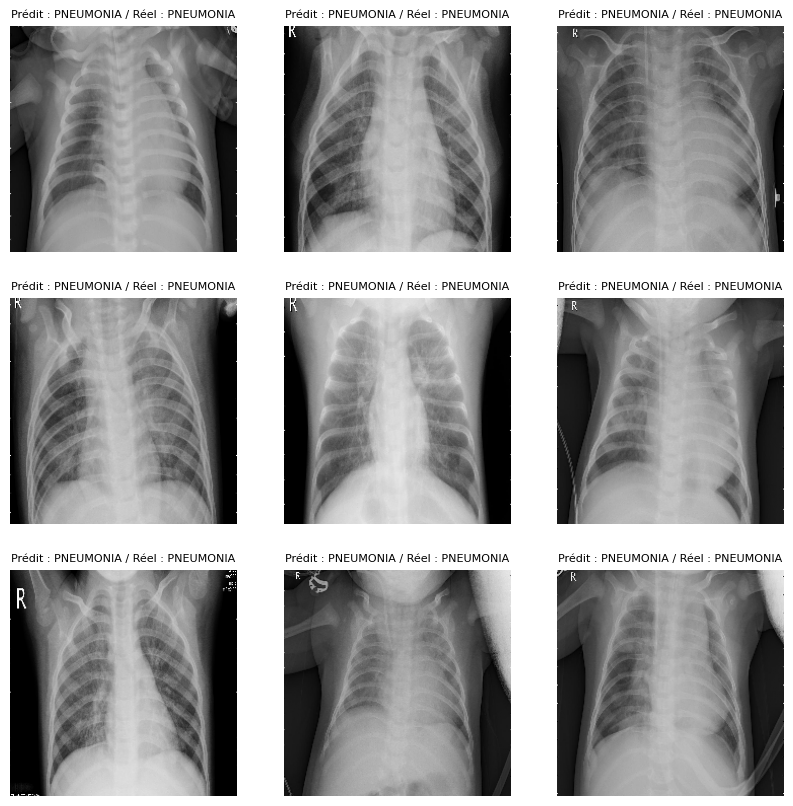

In [11]:
# Évaluation du modèle sur les données de test
test_loss, test_accuracy = model.evaluate(X_test, y_test, batch_size=64)

# Affichage des performances sur l'ensemble de test
print(f"Loss sur les données de test : {test_loss}")
print(f"Accuracy sur les données de test : {test_accuracy}")

# Prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Conversion des probabilités en classes binaires
y_pred_classes = (y_pred > 0.9).astype("int")  # Seuil fixé à 0.9

# Sélectionner uniquement les images prédites comme PNEUMONIE ET qui sont réellement des PNEUMONIA
indices_pneumonia = np.where((y_pred_classes == 1) & (y_test == 1))[0]

# Vérifier si des indices_pneumonia ont été détectés
if len(indices_pneumonia) == 0:
    print("⚠ Aucun cas de pneumonie  détecté avec le seuil actuel.")
else:
    # Mélange aléatoire des indices des PNEUMONIE détectés
    np.random.shuffle(indices_pneumonia)
    indices_a_afficher = indices_pneumonia[:9]  # Sélectionne jusqu'à 9 images aléatoirement

    # Création d'un affichage en grille 3x3 pour montrer quelques images de test et leurs prédictions.
    fig, axes = plt.subplots(3, 3, figsize=(10, 10))
    axes = axes.ravel()

    for i in range(len(indices_a_afficher)):
        idx = indices_a_afficher[i]
        axes[i].imshow(X_test[idx])  # Affichage de l'image de test
        axes[i].axis("off")

        label = "PNEUMONIA" if y_pred_classes[idx] == 1 else "NORMAL"
        true_label = "PNEUMONIA" if y_test[idx] == 1 else "NORMAL"

        # Affichage du titre de l'image indiquant la prédiction et la réalité.
        axes[i].set_title(f"Prédit : {label} / Réel : {true_label}", fontsize=8)

    # Masquer les cases vides si moins de 9 images sont affichées
    for i in range(len(indices_a_afficher), 9):
        axes[i].axis("off")

    plt.show()


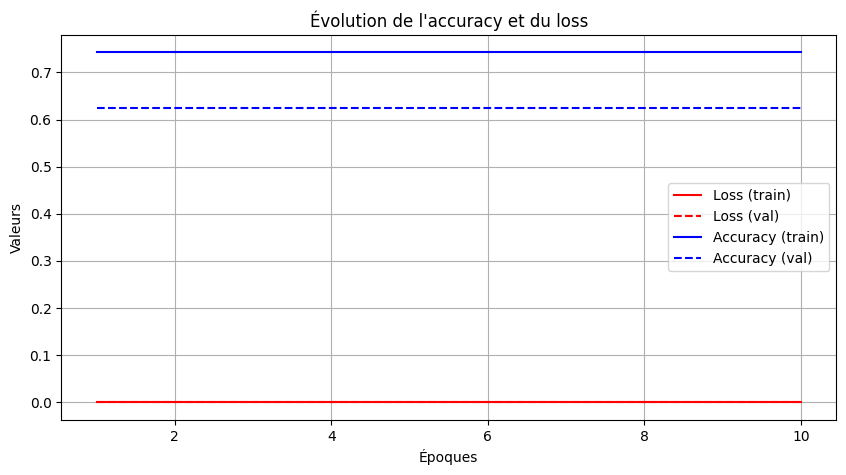

In [12]:
import matplotlib.pyplot as plt

# Récupérer les valeurs de l'historique
epochs = range(1, len(history.history['loss']) + 1)
accuracy = history.history['accuracy']
loss = history.history['loss']
val_accuracy = history.history['val_accuracy']
val_loss = history.history['val_loss']

# Création du graphique
plt.figure(figsize=(10, 5))

# Courbe de la loss
plt.plot(epochs, loss, 'r-', label="Loss (train)")
plt.plot(epochs, val_loss, 'r--', label="Loss (val)")

# Courbe de l'accuracy
plt.plot(epochs, accuracy, 'b-', label="Accuracy (train)")
plt.plot(epochs, val_accuracy, 'b--', label="Accuracy (val)")

# Personnalisation du graphique
plt.xlabel("Époques")
plt.ylabel("Valeurs")
plt.title("Évolution de l'accuracy et du loss")
plt.legend()
plt.grid()
plt.show()
